# Principal Component Analysis

One challenge in machine learning is finding meaning in the data, particularly when it is very high dimensional and can be difficult to visualise. As such **dimensionality reduction**, which is a set of techniques that reduce the number of features in data, can be valuable. Reducing the number of features can make data visualisable, so that the problem can become easier to understand, and can greatly reduce the number of model parameters which need to be optimised, which can save time and data.

One dimensionality reduction technique which we will look at in this bootcamp is pricipal component analysis (PCA). It involves linearly transforming the normalised data such that it varies mostly in the directions of its axes, that are then known as the **pricipal components** of the data. Doing so means that the most important information (that of greatest variation) is captured as the 1st principal component of that data, the second most along the 2nd principal component, the 3rd most along the 3rd and so on. As such, the less important information, which lies along higher principal components, can be discarded by ignoring the values of the data which lie in that direction. Mathematically, this is a projection onto the lower dimensional space spanned by the more important principal components.

So how do you capture the most important information? If we had a 3-d input space, but all of the data points lied at the same height above the x-y plane, then it would be obvious that the z axis values of each of the datapoints could be discarded. This is not because the z-values take any particular value, but because they have zero **variance**. Variance is the mean of the square differences of the feature from that features' mean value:

## $Var(x) = \sigma^2 = \frac{\sum_i^m (x_i - \mu)^2}{m}$

In more than one dimensional space, data variance is characterised by a **covariance matrix**. Whereas the variance characterises averagely how much the feature varies from its mean, the covariance matrix defines how much the features vary together; if, as one feature positively increases away from its mean, another feature also increases positively from its mean, then those two features will have a positive covariance. The formula for the covariance essentially makes each element a linear combination of the distances of one feature from its mean, weighted by the same for another feature; As long as we scale (subtract mean and divide by range/s.d) each feature first, then the covariance matrix can be computed as $X^T X$. Because the product of the scaled features commutes, the covariance matrix is symmetric.

## $Cov(X) = \Sigma = \frac{1}{m} \begin{bmatrix} \Sigma (x_1 - \mu_1)^2 & \dots & \Sigma (x_1 - \mu_1)(x_n - \mu_n)\\ \vdots & \ddots & \vdots \\\Sigma (x_n - \mu_n)(x_1 - \mu_1) & \dots & \Sigma (x_n - \mu_n)^2  \\ \end{bmatrix} = X^T X \in R^{n \times n}$

- Positive covariance: features vary in the same direction together (positively correlated)
- Negative covariance: features vary in opposite directions together (negatively correlated)
- (Near) zero covariance: features are uncorrelated
 
The covariance matrix can be throught of as a transformation of the n dimensional space (as it is a function of each of the features) and is characterised by its eigenvectors which define how that transformation stretches the space. The space is stretched most by a factor of the largest eigenvalue, and least by a factor of the smallest eigenvalue; all points in space which do not lie along the corresponding eigenvectors are scaled by a factor between these two eigenvalues. Because it is symmetric the covariance matrix has orthogonal eigenvectors (a property of a rotation), but the eigenvectors are not of unit length, so the transformation also stretches the space in directions and amounts corresponding to these eigenvectors.

Compressing data using PCA looks like this:
<img src='pcafigs1.png'>
<img src='pcafigs2.png'>

## The code

In [1]:
import numpy as np      # effective math
import matplotlib.pyplot as plt     # ultimate plotting tool
from mpl_toolkits.mplot3d import Axes3D     # 3D plots
import pandas as pd     # allow us to make dataframes to store our data cleanly

In [2]:
data = pd.read_csv('Iris.csv').set_index('Id')  # read our data into a dataframe and set the index to the ID
print(data)     # last column is a label, all other columns are features

X = np.array(data[data.columns[:-1]])   # set our design matrix to the features (all columns except last)
label_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}  # dictionary containing label to number mapping
Y = np.array([label_dict[i] for i in data[data.columns[-1]]])   # put out labels into a np array
print(Y)

print(X.shape)      # 150 rows (datapoints), 4 columns (features)
print(Y.shape)      # 150 single dimension labels

m = X.shape[0]      # 150 rows

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
6              5.4           3.9            1.7           0.4     Iris-setosa
7              4.6           3.4            1.4           0.3     Iris-setosa
8              5.0           3.4            1.5           0.2     Iris-setosa
9              4.4           2.9            1.4           0.2     Iris-setosa
10             4.9           3.1            1.5           0.1     Iris-setosa
11             5.4           3.7            1.5           0.2   

To compute our covariance matrix from $X^TX$, we must scale our features:

In [10]:
def normalise(x):
    """Centre around mean and divide by range to put all features on similar scale"""
    x_std = x - np.mean(x, axis=0)      # subtract the mean
    x_std = np.divide(x_std, np.std(x_std, axis=0))     # divide each feature by the range of that feature (-1 < x < 1)
    return x_std    # return our standardised features

X_std = normalise(X)    # centre data around mean and divide by range/s.d

Now lets find the covariance of our data and its eigenvalues and eigenvectors

In [11]:
def decompose(x):
    """Compute the covariance matrix of the data and find its eigen properties"""
    cov = np.matmul(x.T, x)     # compute the covariance matrix
    print('\nCovariance matrix')
    print(cov)

    eig_vals, eig_vecs = np.linalg.eig(cov)     # find the eigenvalues and eigenvectors of the covariance matrix
    print('\nEigenvectors')
    print(eig_vecs)
    print('\nEigenvalues')
    print(eig_vals)
    return eig_vals, eig_vecs, cov

eig_vals, eig_vecs, covariance = decompose(X_std)      # compute the covariance matrix and find its characteristics


Covariance matrix
[[ 150.          -16.40538749  130.7631236   122.69304501]
 [ -16.40538749  150.          -63.07741446  -53.48161344]
 [ 130.7631236   -63.07741446  150.          144.41356456]
 [ 122.69304501  -53.48161344  144.41356456  150.        ]]

Eigenvectors
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues
[ 436.62271256  138.18313961   22.10299175    3.09115609]


We can visualise how each eigenvector contributes to the variance of our data by conparing their eigenvectors. The eigenvalues define how much each eigenvector has scaled the space, which corresponds to the variance of the data in each orthogonal direction. The eigenvectors with greater eigenvalues correspond to the directions which the data varies more in and hence contain more information. We will keep those which are most important and throw away the others to reduce the dimensionality of our data.

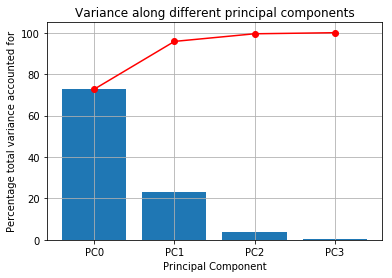

In [12]:
def whicheigs(eig_vals):
    """"Plot the variance accounted for by each eigenvector and their cumulative sum"""
    total = sum(eig_vals)   # sum up the eigenvalues so we can compare each one to the total to determine their importance
    var_percent = [(i/total) * 100 for i in eig_vals]   # calculate the percentage variance of the data which this eigenvalue accounts for
    cum_var_percent = np.cumsum(var_percent)    # make a vector of the cumulative sum of the variance percentages

    fig = plt.figure()      # make a figure
    ax =  fig.add_subplot(111)      # add an axis
    plt.title('Variance along different principal components')
    ax.grid()
    plt.xlabel('Principal Component')
    plt.ylabel('Percentage total variance accounted for')

    ax.plot(cum_var_percent, '-ro')     # plot the cumulative sum of the variances accounted for by each eigenvector
    ax.bar(range(len(eig_vals)), var_percent) # position, height # show how much variance individual eig accounts for
    plt.xticks(np.arange(len(eig_vals)), ('PC{}'.format(i) for i in range(len(eig_vals))))  # set the xticks to 'PC1' etc
    plt.show()  # show us the figure
    
whicheigs(eig_vals)     # visualise the variance of the data for each eigenvector of the covariance matrix

Now, using the matrix of eigenvectors which we returned above, we can throw away the less important vectors (the end columns) and rotate our data such that these become the axes which describe it.

In [13]:
def reduce(x, eig_vecs, dims):
    """reduce the number of dimensions of our data by transforming by the truncated matrix of covariance eigenvectors"""
    W = eig_vecs[:, :dims]
    print('\nDimension reducing matrix')
    print(W)
    return np.matmul(x, W), W

X_reduced, transform = reduce(X_std, eig_vecs, dim)     # transform our data into a lower dimension

print(X_reduced.shape)
print(transform.shape)


Dimension reducing matrix
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [ ]:
Now that we have transformed our data to a lower dimension, we can visualise it.

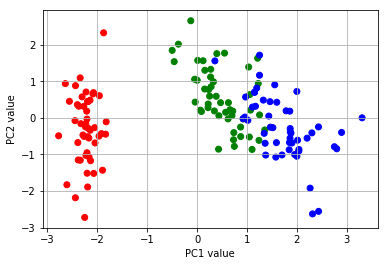

In [14]:
colour_dict = {0:'r', 1:'g', 2:'b'}     # map labels to colours for plotting
colour_list = [colour_dict[i] for i in list(Y)]     # generator to give list of colours corresponding to each class

dim = 2 # variable to define how many dimensions we want to map our data to

def plotreduced(x):
    """Plot the data which has been transformed to a visualisable dimension"""
    fig = plt.figure()      # make a figure
    plt.grid()
    if dim == 3:
        ax = fig.add_subplot(111, projection='3d')      # add a 3d set of axes
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=colour_list)    # scatter plot our 3d data
        plt.xlabel('PC1 value')
        plt.ylabel('PC2 value')
        ax.set_zlabel('PC3 value')
    elif dim == 2:
        ax = fig.add_subplot(111)      # add a 2d set of axes
        ax.scatter(x[:, 0], x[:, 1], c=colour_list)    # scatter plot our 3d data
        plt.xlabel('PC1 value')
        plt.ylabel('PC2 value')
    elif dim == 1:
        ax = fig.add_subplot(111)       # add a 2d axis
        ax.scatter(x, np.zeros_like(x), c=colour_list)      # plot the 1D data along the x axis (zero for each y value)
        plt.xlabel('PC1 Value')
    plt.show()
    return ax

ax = plotreduced(X_reduced)      # check out how the data looks in a visualisable dimension

## K-means clustering

K-means clustering is a simple unsupervised learning algorithm that groups data based on its position in space.

- Step 1: randomly initialise some centroids
- Step 2: assign datapoints to their nearest centroid
- Step 3: update the position of each centroid to the mean position of its assigned datapoints
- Step 4: repeat 2-3 until centroids stabilise

<img src='Kmeans_animation.gif'>

In [ ]:
epochs = 30

def k_means(x, y, centroids=3):
    """Cluster the data"""
    # Step 1
    positions = 2* np.random.rand(centroids, dim).reshape(centroids, dim) - 1 # randomly intialise initial centroid positions
    m = x.shape[0]  # number of training examples

    for i in range(epochs):     # cycle through our data a bunch of times
        assignments = np.zeros(m)   # initialise a list of which datapoints belong to which class
        #assignment_dict = {0:'C1', 1:'C2', 2:'C3'}

        # Step 2
        # assign each data point to a centroid
        for datapoint in range(m):  # for each of our datapoints
            difference = X_reduced[datapoint] - positions   # find the distance from each centroid (row) in each dimension (column)
            norms = np.linalg.norm(difference, 2, axis=1) # find the euclidian distance from the datapoint to each centroid
            assignment = np.argmin(norms)   # assign that datapoint to the nearest centroid
            print('difference', 'norms, assignment')
            print(difference, norms, assignment)
            assignments[datapoint] = assignment #assignment_dict[assignment] # update the list of all assignments

        for c in range(centroids):  # update the position of each centroid to the mean of the datapoints currently assigned to it
            positions[c] = np.mean(x[assignments == c], axis=0)     # find which datapoints are assigned to each centroid, index them from the design matrix and find their mean position
            #print(x[assignments == c])
            #print(np.mean(x[assignments==c], axis=0))

        print('\nassignments')
        print(assignments)
        print('\nLabels')
        print(y)

    print('Centroid positions')
    print(positions)
    return positions

In [ ]:
positions = k_means(X_reduced, Y, 3)

# plot our centroids on the axis which we returned earlier
if dim == 3:
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], marker='x', s=100, c='k')
elif dim == 2:
    ax.scatter(positions[:, 0], positions[:, 1], marker='x', s=100, c='k')
elif dim == 1:
    ax.scatter(positions[:, 0], marker='x', s=100, c='k')

plt.show()